In [2]:
#Ladowanie potrzebnych pakietow
import time, random, math, skimage, os
from skimage import io

In [3]:
###definicje### 
def przywitanie(imie):
    ###wita uzytkownika i podaje zasady###
    print(f"""
    
    Hejka {imie} ;)
    witam w quizie roślinnym, program wyświetli zdjęcia roślin i zapyta co to za gatunek. 
    Możesz wybrać liczbę pytań i wersję językową. 
    Masz do wyboru trzy wersje nazw gatunkowych: 
    1 - Łacinskie, 
    2 - Polskie,
    3 - Polsko-łacinskie
    Mozesz wybrać liczbę pytań od 1 do 12. 
    Jeśli nie wiesz co wybrać, możesz wybrać wersję domyślną czyli 5 pytań po Polsku. 
    """)
    

def odp_wys(pop_bl):
    ###wyswietla wstep do listy odpowiedzi###
    print(f"""\n\n{pop_bl} udzielone odpowiedzi:
     Obraz:                            Poprawne:""")

def prawda(FT):
    ###zamienia wartosc bool na tak lub nie###
    if FT == False:
        return "Nie"
    else:
        return "Tak"

def zapis_wyniku(data, sciezka_pliku, pkt, max, poprawne_odp, NIEpoprawne_odp):
    sciezka = os.path.join(os.getcwd(), "Wyniki.txt")

    zapis = (data + " | " + sciezka_pliku + " | " + str(pkt) + \
             " | " + str(max) + " | " +  poprawne_odp + " | " + NIEpoprawne_odp + "\n")
  
    with open(sciezka, "a", encoding="utf-8") as Z: 
        Z.write(zapis)
        
    print('\n\nzapisano: data, Plik, pkt, max, poprawne_odp, NIEpoprawne_odp')
    print('zapisano wynik:', data + " | " + sciezka_pliku + " | " + str(pkt) + \
          " | " + str(max) + " | " + poprawne_odp + " | " + NIEpoprawne_odp)
        

In [4]:
class Pytanie:
    ###ustalanie odpowiedzi###
    def __init__(self, licznik: int, nazwa: str, opis: str, rodzina: str, status: str, poprawna: str, odpowiedzi: list):
        self.licznik = licznik
        self.nazwa = nazwa
        self.opis = opis
        self.rodzina = rodzina
        self.status = status
        self.poprawna = poprawna
        self.mozliwe = self.generuj_odpowiedzi(odpowiedzi)
        
    def generuj_odpowiedzi(self, odpowiedzi: list) -> dict:
        random.shuffle(odpowiedzi)
        return {'a': odpowiedzi[0], 'b': odpowiedzi[1], 'c': odpowiedzi[2], 'd': odpowiedzi[3], 'e': odpowiedzi[4]}

    
class Domyslna:
    ###ustalanie wersji quizu###
    def __init__(self):
        self.max_lb_pyt = 12

        while True:
                self.czy_domyslna = input("\nCzy chcesz zagrać \
w Polską wersję z 5 pytaniami? \nJeśli tak, wpisz 't' lub 'tak'. \n\
Jeśli nie, wpisz 'n' lub 'nie':\n").lower()

                if self.czy_domyslna == "t" or self.czy_domyslna == "tak":  
                    self.wersja_jez = "p"
                    self.lb_pyt = 5
                    self.ost_wersja = "polish"
                    break
                elif self.czy_domyslna == "n" or self.czy_domyslna == "nie":

#wybieranie przez uzytkownika wersji jezykowej                    
                    while True:
                            self.wersja_jez = input("\nJaką chcesz wersję: po Polsku, po Łacinie czy mieszaną?\n\
Napisz odpowiednio: p, l lub m.\n").lower()
                            if self.wersja_jez == "p": 
                                self.ost_wersja = "polish"
                                break
                            elif self.wersja_jez == "l":
                                self.ost_wersja = "latin"
                                break
                            elif self.wersja_jez == "m":
                                self.ost_wersja = "latin-polish"            
                                break

#wybieranie przez uzytkownika liczby pytan
                    while True:
                        try:
                            self.lb_pyt = int(input("\nNa ile pytań chcesz odpowiadać?\nWpisz liczbę od 1 do 12.\n"))
                            if isinstance(self.lb_pyt, int) and self.lb_pyt > 0 and self.lb_pyt <= self.max_lb_pyt: 
                                break
                            else:    
                                continue

#gdyby uzytkownik wpisal cos innego w miejsce liczby                       
                        except ValueError as e: 
                                print('Proszę wprowadzić liczbę.')

#zakonczenie  
                    break  
            

class Sciezka:
     def __init__(self):
     ###ustawianie sciezek folderow###
        self.sciezka_zdj = os.path.join(os.getcwd(), "data", "plant")      
        self.sciezka_wersji = os.path.join(os.getcwd(), "data", "wersje")
 
#lista dostepnych gatunkow        
        self.lista_gat = os.listdir(self.sciezka_zdj)
        self.tylko_gat = self.lista_gat_def()
          
     def lista_gat_def(self):        
     ###Uzyskujemy liste dostepnych gatunkow###     
        self.tylko_gat = []
        for gatunek in self.lista_gat:
            if gatunek.endswith(".jpg"):
                self.tylko_gat.append(gatunek)
            else:
                pass
        return self.tylko_gat

Jak masz na imię?
k

    
    Hejka K ;)
    witam w quizie roślinnym, program wyświetli zdjęcia roślin i zapyta co to za gatunek. 
    Możesz wybrać liczbę pytań i wersję językową. 
    Masz do wyboru trzy wersje nazw gatunkowych: 
    1 - Łacinskie, 
    2 - Polskie,
    3 - Polsko-łacinskie
    Mozesz wybrać liczbę pytań od 1 do 12. 
    Jeśli nie wiesz co wybrać, możesz wybrać wersję domyślną czyli 5 pytań po Polsku. 
    

Czy chcesz zagrać w Polską wersję z 5 pytaniami? 
Jeśli tak, wpisz 't' lub 'tak'. 
Jeśli nie, wpisz 'n' lub 'nie':
t


    -------------------------------------------------------------

Wyświetli się obrazek
Proszę podaj odpowiedź: 
a, b, c, d lub e.

    -------------------------------------------------------------
        
1.


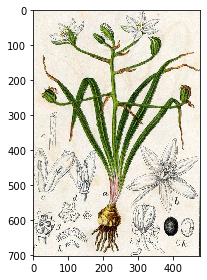

a) szałwia okręgowa
b) śniedek baldaszkowaty
c) mierznica czarna
d) ostrzew spłaszczony
e) kropidło wodne

Podaj odpowiedź: 
a

    -------------------------------------------------------------
        
2.


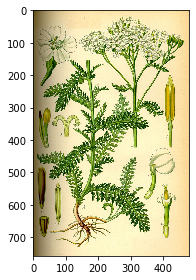

a) żywokost lekarski
b) krwawnik pospolity
c) wierzba pięciopręcikowa
d) brodawnik zwyczajny
e) mietlica olbrzymia

Podaj odpowiedź: 
b

    -------------------------------------------------------------
        
3.


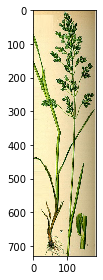

a) czyściec błotny
b) pełnik europejski
c) janowiec barwierski
d) wiechlina zwyczajna
e) rumian polny

Podaj odpowiedź: 
d

    -------------------------------------------------------------
        
4.


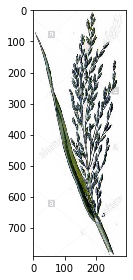

a) rogownica pospolita
b) manna mielec
c) rdest wężownik
d) lucerna nerkowata
e) macierzanka nagolistna

Podaj odpowiedź: 
b

    -------------------------------------------------------------
        
5.


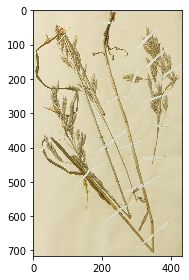

a) zerwa kulista
b) wiosnówka pospolita
c) lepnica biała
d) topola czarna
e) stokłosa bezostna

Podaj odpowiedź: 
a


    -------------------------------------------------------------


Zdobyłeś/aś 3 punktów z 5 możliwych,
    czyli odpowiedziałeś/aś poprawnie na 60.0% pytań.
Zajęło Ci to 0.71 minut(y)


Pytanie: 1. Ornithogalum umbellatum.jpg 
        Poprawna:            Poprawna odpowiedź:            Odpowiedź:                      
        Nie                  śniedek baldaszkowaty          szałwia okręgowa              

        Rodzina:             Status:
        Asparagaceae         apofit muraw kserotermicznych 


Pytanie: 2. Achillea millefolium.jpg 
        Poprawna:            Poprawna odpowiedź:            Odpowiedź:                      
        Tak                  krwawnik pospolity             krwawnik pospolity            

        Rodzina:             Status:
        Asteraceae           rodzimy łąkowy                


Pytanie: 3. Poa trivialis.jpg 
        Poprawna

In [5]:
###Quiz###
#Podanie przez gracza imienia
imie_gracza = input("Jak masz na imię?\n").title()

#Przywitanie
przywitanie(imie_gracza)

#ustawienie sciezek folderow
sciezka = Sciezka()


#start petli
anserw = 'tak'
while anserw == 'tak':

    ###Sciezki, zdjeci###
    #ustawienie wersji, czy domyslna czy uzytkownik wybiera
    odp_klasa = Domyslna()                           

    #Uzyskujemy ostateczna sciezke pliku        
    rosliny_plik = "plant " + odp_klasa.ost_wersja + "_2.txt"
    ost_sciezka_wersji = os.path.join(sciezka.sciezka_wersji, rosliny_plik)

    #losujemy gatunki
    wybrane_gat = random.sample(sciezka.tylko_gat,odp_klasa.lb_pyt)

    ###Zapis informacji o wybranych gatunkach do listy, podzielonej na listy informacjami###
    #Otwarcie pliku
    with open(ost_sciezka_wersji, "r", encoding="utf-8") as S:
        wiersze = S.readlines()

    #podzielenie kazdej z wybranych linii(1 linia = rozne informacje o 1 gatunku) na poszczegolne informacje i zapisanie w liscie   
        wybrane_pytania = []
        for wiersz in wiersze:
            for gatunek in wybrane_gat:
                if wiersz.startswith(gatunek):
                    wiersz = wiersz[:-1]
                    rozdzielony_wiersz  = wiersz.split(" | ")
                    nowy_wiersz = [[rozdzielony_wiersz[0]] + [rozdzielony_wiersz[1]] + [rozdzielony_wiersz[2]]\
                                  + [rozdzielony_wiersz[3]] + [rozdzielony_wiersz[4]] + rozdzielony_wiersz[5:]]           
                    wybrane_pytania.extend(nowy_wiersz)

    #zmiana kolejnosci pytan
        random.shuffle(wybrane_pytania)

    #tworzy zbior pytan
    zbior_pytan = []
    for i, wartosci in enumerate(wybrane_pytania):            
        wszystkie_odpowiedzi = wartosci[4:]    
        pytanie = Pytanie(licznik=i+1, 
                          nazwa=wartosci[0],
                          opis=wartosci[1], 
                          rodzina=wartosci[2], 
                          status=wartosci[3],
                          poprawna=wartosci[4],
                          odpowiedzi=wszystkie_odpowiedzi)       
        zbior_pytan.append(pytanie)   
    #print(zbior_pytan[1].__dict__)    

    #Tworzenie zmiennych
    licznik = 0 #by wyswietlalo kolejne pytania, a nie w kolko to samo  
    lista_nr_pytan = list(range(1,odp_klasa.lb_pyt+1)) # +1 bo w Pythonie jest od 0, a normalnie jest od 1
    odpowiedzi_slowa, odpowiedzi = [], []        
    poczatek_czasu = time.time()


    ###Odpytywanie###
    #zadawanie pytan
    print("""\n
    -------------------------------------------------------------""")
    print('\nWyświetli się obrazek\nProszę podaj odpowiedź: \na, b, c, d lub e.') 
    for pytanie in zbior_pytan:
        print("""
    -------------------------------------------------------------
        """)
        print(str(licznik+1) + ".")

    #Wyswietlanie obrazka    
        sciezka_zdj_koncowa = os.path.join(sciezka.sciezka_zdj, pytanie.nazwa)
        image = io.imshow(io.imread(sciezka_zdj_koncowa))
        skimage.io.show()     

    #Wyswietla mozliwe odpowiedzi    
        for klucz in pytanie.mozliwe.keys():
            print(klucz + ")", pytanie.mozliwe[klucz])
            mozliwe_odp = set('abcde') #('a', 'b','c','d','e')
            odpowiedz = 'nie'

    #Uzytkownik wpisuje odpowiedz, odp zostaje zapisana        
        while odpowiedz == 'nie':
            #time.sleep(1)
            odpowiedz = input("\nPodaj odpowiedź: \n").lower()
            #while len(odpowiedz) > 1
            odp =set(odpowiedz)

    #zapis odp i gat w listach        
            if odp & mozliwe_odp:
                odpowiedzi.append(odpowiedz)
                odpowiedzi_slowa.append(pytanie.mozliwe[odpowiedz])
            else:
                odpowiedz = 'nie'
                print('Nie ma takiej opcji, spróbuj jeszcze raz:')

        licznik += 1
        koniec_czasu = (time.time() - poczatek_czasu)

    #tworzenie zmiennych
    licz, punkty = 0, 0
    znane_odpowiedzi, nieznane_odpowiedzi, nieznane_poprawne_odpowiedzi, odpowiedzi_TF = [],[],[],[]
    znane_pytania, nieznane_pytania, wyjasnienia_nieznanych = [],[],[]

    #zapisuje odpowiedzi uzytkownika, dzielac je na poprawne i bledne
    for licz, odpowiedz in enumerate(odpowiedzi):
        pytanie = zbior_pytan[licz]
        if pytanie.mozliwe[odpowiedz] == pytanie.poprawna:  
            punkty +=1
            odpowiedzi_TF.append(True)
            znane_odpowiedzi.append(pytanie.poprawna)
            znane_pytania.append(pytanie.nazwa)

        else:
            odpowiedzi_TF.append(False)
            nieznane_odpowiedzi.append(odpowiedz)
            nieznane_poprawne_odpowiedzi.append(pytanie.poprawna)
            nieznane_pytania.append(pytanie.nazwa)
            wyjasnienia_nieznanych.append(pytanie.opis)


    ###Podsumowanie dla uzytkownika###    
    #Wyswietla wynik punktowy    
    print("""\n
    -------------------------------------------------------------""")
    print(f"""\n\nZdobyłeś/aś {punkty} punktów z {len(odpowiedzi)} możliwych,
    czyli odpowiedziałeś/aś poprawnie na {(punkty/len(odpowiedzi)*100):.1f}% pytań.""")
    print(f'Zajęło Ci to {koniec_czasu/60:.2f} minut(y)')

    #Wyswietla odp
    licz = 0
    kolejnosc_pytan = {}
    for odp in odpowiedzi_TF:      
        pytanie = zbior_pytan[licz]
        print(f"""\n\nPytanie: {str(licz+1)+'.'} {pytanie.nazwa} 
        Poprawna:            Poprawna odpowiedź:            Odpowiedź:                      
        {prawda(odp):<20s} {pytanie.poprawna:<30s} {odpowiedzi_slowa[licz]:<30s}

        Rodzina:             Status:
        {pytanie.rodzina:<20s} {pytanie.status:<30s}""")
        licz += 1
        kolejnosc_pytan.update({pytanie.nazwa:str(licz)+'.'}) #by przy podziale na poprawne i nie pokazywalo nr pytania
        
    #Wyswietla poprawne odpowiedzi   
    print("""\n
    -------------------------------------------------------------""")
    odp_wys("Poprawnie")
    licznik = 0   
    for odpowiedz in znane_pytania:       
        print(f" {kolejnosc_pytan[str(znane_pytania[licznik])]:<4s}{znane_pytania[licznik]:<30s}\
        {znane_odpowiedzi[licznik]:<30s}")
        licznik +=1  

    #Wyswietla bledne odpowiedzi    
    odp_wys("Błędnie")
    licznik = 0
    for odpowiedz in nieznane_pytania: 
        print(f" {kolejnosc_pytan[str(nieznane_pytania[licznik])]:<4s}{nieznane_pytania[licznik]:<30s}\
        {nieznane_poprawne_odpowiedzi[licznik]:<30s}")
        licznik +=1


    #Zapis wyniku do pliku
    print("""\n
    -------------------------------------------------------------""")
    data = time.strftime("%Y/%m/%d | %H:%M", time.localtime())
    zapis_wyniku(data, odp_klasa.ost_wersja, punkty, len(odpowiedzi), str(znane_odpowiedzi), str(nieznane_pytania))
    print("""\n
    """)

#koniec pentli    
    anserw = input("wpisz 'tak' by powtórzyć: \n").lower()
else:
    print('\nTo cześć, dziena za dziś! ;)')